
Dataset Original:
                nombre  persistencia_dias  toxicidad  bioacumulacion  \
0        Ácido_Cítrico        1367.696894   2.058449      611.852895   
1     Carbonato_Calcio        3470.156504  96.990985      139.493861   
2       Enzima_Natural        2672.045894  83.244264      292.144649   
3                  PCB        2185.504809  21.233911      366.361843   
4             Mercurio         570.312019  18.182497      456.069984   
5                  DDT         570.224005  18.340451      785.175961   
6                 PFAS         212.947101  30.424224      199.673782   
7          Biopolímero        3161.676756  52.475643      514.234438   
8  Plaguicida_Orgánico        2194.468678  43.194502      592.414569   
9        Metilmercurio        2584.756836  29.122914       46.450413   

   biodegradabilidad  impacto_ecosistema  
0          60.754485            1.220382  
1          17.052412            4.951769  
2           6.505159            0.343885  
3          94.88

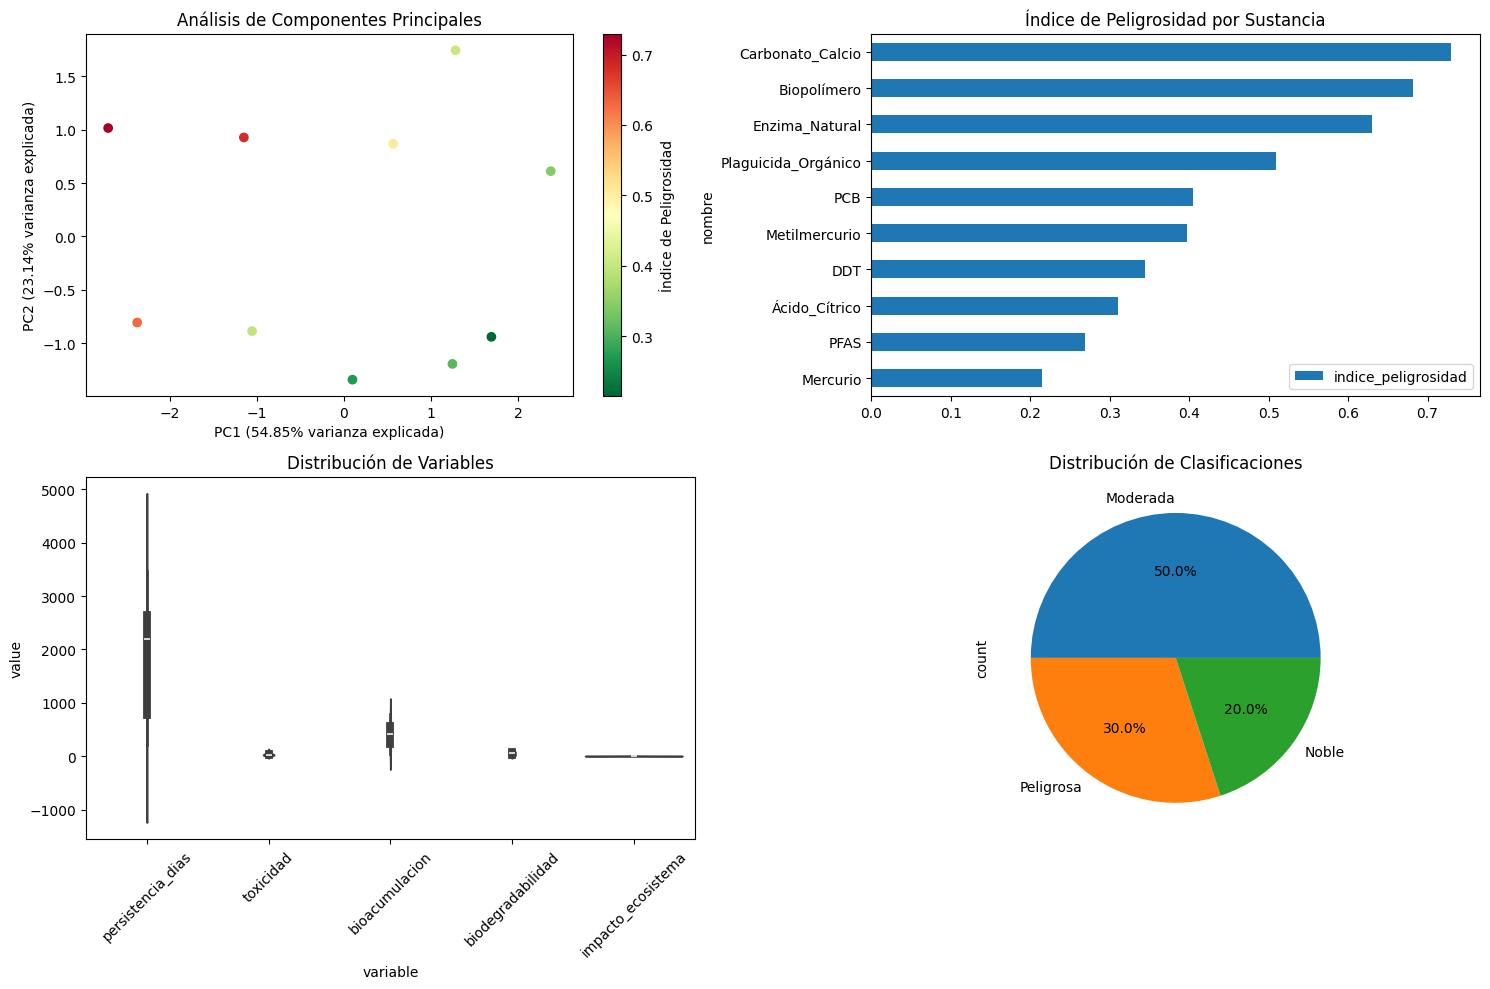

,nombre,persistencia_dias,toxicidad,bioacumulacion,biodegradabilidad,impacto_ecosistema,indice_peligrosidad,clasificacion
0,Ácido_Cítrico,1367.696894,2.058449,611.852895,60.754485,1.220382,0.311002,Moderada
1,Carbonato_Calcio,3470.156504,96.990985,139.493861,17.052412,4.951769,0.729534,Peligrosa
2,Enzima_Natural,2672.045894,83.244264,292.144649,6.505159,0.343885,0.629841,Peligrosa
3,PCB,2185.504809,21.233911,366.361843,94.888554,9.093204,0.404587,Moderada
4,Mercurio,570.312019,18.182497,456.069984,96.563203,2.587800,0.214578,Noble
5,DDT,570.224005,18.340451,785.175961,80.839735,6.625223,0.344747,Moderada
6,PFAS,212.947101,30.424224,199.673782,30.461377,3.117111,0.268977,Noble
7,Biopolímero,3161.676756,52.475643,514.234438,9.767211,5.200680,0.681256,Peligrosa
8,Plaguicida_Orgánico,2194.468678,43.194502,592.414569,68.423303,5.467103,0.508873,Moderada
9,Metilmercurio,2584.756836,29.122914,46.450413,44.015249,1.848545,0.397006,Moderada


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataset sintético de sustancias químicas y sus características
def crear_dataset_quimicos():
    np.random.seed(42)
    
    # Crear datos para 10 sustancias químicas diferentes
    sustancias = {
        'nombre': [
            'Ácido_Cítrico', 'Carbonato_Calcio', 'Enzima_Natural',
            'PCB', 'Mercurio', 'DDT', 'PFAS', 'Biopolímero',
            'Plaguicida_Orgánico', 'Metilmercurio'
        ],
        'persistencia_dias': np.random.uniform(1, 3650, 10),  # 1 día a 10 años
        'toxicidad': np.random.uniform(0, 100, 10),  # Escala 0-100
        'bioacumulacion': np.random.uniform(0, 1000, 10),  # Factor de bioacumulación
        'biodegradabilidad': np.random.uniform(0, 100, 10),  # Porcentaje
        'impacto_ecosistema': np.random.uniform(0, 10, 10)  # Escala 0-10
    }
    
    return pd.DataFrame(sustancias)

# Función para calcular índice de peligrosidad
def calcular_peligrosidad(row):
    return (
        (row['persistencia_dias'] / 3650) * 0.3 +  # 30% peso
        (row['toxicidad'] / 100) * 0.25 +          # 25% peso
        (row['bioacumulacion'] / 1000) * 0.2 +     # 20% peso
        ((100 - row['biodegradabilidad']) / 100) * 0.15 +  # 15% peso
        (row['impacto_ecosistema'] / 10) * 0.1     # 10% peso
    )

# Función para clasificar sustancias
def clasificar_sustancia(indice):
    if indice < 0.3:
        return 'Noble'
    elif indice < 0.6:
        return 'Moderada'
    else:
        return 'Peligrosa'

# Función para analizar las sustancias
def analizar_sustancias(df):
    # Calcular índice de peligrosidad
    df['indice_peligrosidad'] = df.apply(calcular_peligrosidad, axis=1)
    df['clasificacion'] = df['indice_peligrosidad'].apply(clasificar_sustancia)
    
    # Realizar análisis estadístico básico
    estadisticas = df.describe()
    
    # Realizar PCA para visualización
    scaler = StandardScaler()
    features = ['persistencia_dias', 'toxicidad', 'bioacumulacion', 
                'biodegradabilidad', 'impacto_ecosistema']
    X_scaled = scaler.fit_transform(df[features])
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    return df, estadisticas, X_pca, pca.explained_variance_ratio_

# Función para visualizar resultados
def visualizar_resultados(df, X_pca, var_ratio):
    # Crear figura con subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Gráfico de dispersión PCA
    ax1 = plt.subplot(221)
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=df['indice_peligrosidad'], cmap='RdYlGn_r')
    ax1.set_title('Análisis de Componentes Principales')
    ax1.set_xlabel(f'PC1 ({var_ratio[0]:.2%} varianza explicada)')
    ax1.set_ylabel(f'PC2 ({var_ratio[1]:.2%} varianza explicada)')
    plt.colorbar(scatter, label='Índice de Peligrosidad')
    
    # 2. Gráfico de barras de índice de peligrosidad
    ax2 = plt.subplot(222)
    df.sort_values('indice_peligrosidad', ascending=True).plot(
        kind='barh', x='nombre', y='indice_peligrosidad', ax=ax2)
    ax2.set_title('Índice de Peligrosidad por Sustancia')
    
    # 3. Gráfico de violín para variables principales
    ax3 = plt.subplot(223)
    df_melt = df[['persistencia_dias', 'toxicidad', 'bioacumulacion', 
                  'biodegradabilidad', 'impacto_ecosistema']].melt()
    sns.violinplot(data=df_melt, x='variable', y='value', ax=ax3)
    ax3.set_title('Distribución de Variables')
    plt.xticks(rotation=45)
    
    # 4. Gráfico de pie para clasificación
    ax4 = plt.subplot(224)
    df['clasificacion'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax4)
    ax4.set_title('Distribución de Clasificaciones')
    
    plt.tight_layout()
    plt.show()

# Función principal que ejecuta todo el análisis
def ejecutar_analisis_completo():
    # Crear dataset
    df = crear_dataset_quimicos()
    print("\nDataset Original:")
    print(df)
    
    # Realizar análisis
    df_analizado, estadisticas, X_pca, var_ratio = analizar_sustancias(df)
    
    print("\nEstadísticas Descriptivas:")
    print(estadisticas)
    
    print("\nResultados del Análisis:")
    print(df_analizado[['nombre', 'indice_peligrosidad', 'clasificacion']]
          .sort_values('indice_peligrosidad'))
    
    # Visualizar resultados
    visualizar_resultados(df_analizado, X_pca, var_ratio)
    
    return df_analizado

# Ejecutar el análisis
ejecutar_analisis_completo()

In [3]:
from rdkit import Chem

In [4]:
def read_smi(file_path):
    smiles_list = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 1:
                smiles, name = parts[0], " ".join(parts[1:])
            else:
                smiles, name = parts[0], None
            smiles_list.append((smiles, name))
    return smiles_list

In [5]:
file_path = "./chembl_22_clean_1576904_sorted_std_final.smi"
data = read_smi(file_path)

In [7]:
df_smiles = pd.DataFrame(data, columns=["SMILES", "Name"])
print(df_smiles)

                                                    SMILES           Name
0                                                      CCO      CHEMBL545
1                                                        C    CHEMBL17564
2                                                       CO    CHEMBL14688
3                                                     NCCS      CHEMBL602
4                                                     NCCN      CHEMBL816
...                                                    ...            ...
1576899  CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...  CHEMBL1077161
1576900  CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...  CHEMBL1077162
1576901  n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...  CHEMBL1077165
1576902  CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...  CHEMBL1077164
1576903  CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...  CHEMBL1077163

[1576904 rows x 2 columns]


In [8]:
print(df_smiles.shape)

(1576904, 2)


In [9]:
print(df_smiles.isnull().sum())

SMILES    0
Name      0
dtype: int64


In [11]:
print(df_smiles.head(20))

    SMILES          Name
0      CCO     CHEMBL545
1        C   CHEMBL17564
2       CO   CHEMBL14688
3     NCCS     CHEMBL602
4     NCCN     CHEMBL816
5       CN   CHEMBL43280
6      C=O    CHEMBL1255
7      CCN   CHEMBL14449
8      CSC   CHEMBL15580
9      CBr   CHEMBL48339
10      CI  CHEMBL115849
11      CF  CHEMBL116838
12      CC  CHEMBL135626
13   CNC=O    CHEMBL9240
14    CCCN   CHEMBL14409
15    CCCO   CHEMBL14687
16  O=CC#C     CHEMBL722
17  C=CC=O     CHEMBL721
18    CC#N   CHEMBL45211
19    CCCl   CHEMBL46058
